In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
df8 = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')


In [9]:
df8

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.612610
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.595166
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.460924


In [10]:
X = df8.drop('pIC50', axis=1)
Y = df8.pIC50

In [11]:
# Examine X dimension
X.shape

(4695, 881)

In [12]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [13]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [15]:
X_test.shape, Y_test.shape

((939, 137), (939,))

In [17]:
# Defines and builds the lazyclassifier
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|████████████████████████████████████████████████████████████████████████████████████████████▋  | 41/42 [02:57<00:02,  2.37s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [02:59<00:00,  4.26s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|████████████████████████████████████████████████████████████████████████████████████████████▋  | 41/42 [02:19<00:02,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [02:21<00:00,  3.37s/it]


In [18]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.86,0.86,0.57,0.22
ExtraTreeRegressor,0.86,0.86,0.57,0.82
ExtraTreesRegressor,0.86,0.86,0.57,31.44
GaussianProcessRegressor,0.86,0.86,0.57,24.33
RandomForestRegressor,0.82,0.83,0.64,11.91
XGBRegressor,0.82,0.83,0.65,1.26
BaggingRegressor,0.80,0.81,0.67,1.37
MLPRegressor,0.76,0.77,0.75,17.64
HistGradientBoostingRegressor,0.67,0.69,0.87,8.16


In [19]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,11.45
RandomForestRegressor,0.44,0.52,1.08,18.44
LGBMRegressor,0.44,0.52,1.08,1.75
XGBRegressor,0.43,0.51,1.09,4.90
BaggingRegressor,0.41,0.49,1.11,1.66
NuSVR,0.39,0.48,1.12,6.36
SVR,0.39,0.48,1.12,5.65
KNeighborsRegressor,0.37,0.47,1.14,0.28
MLPRegressor,0.36,0.45,1.15,15.58


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


[(0.0, 1.0)]

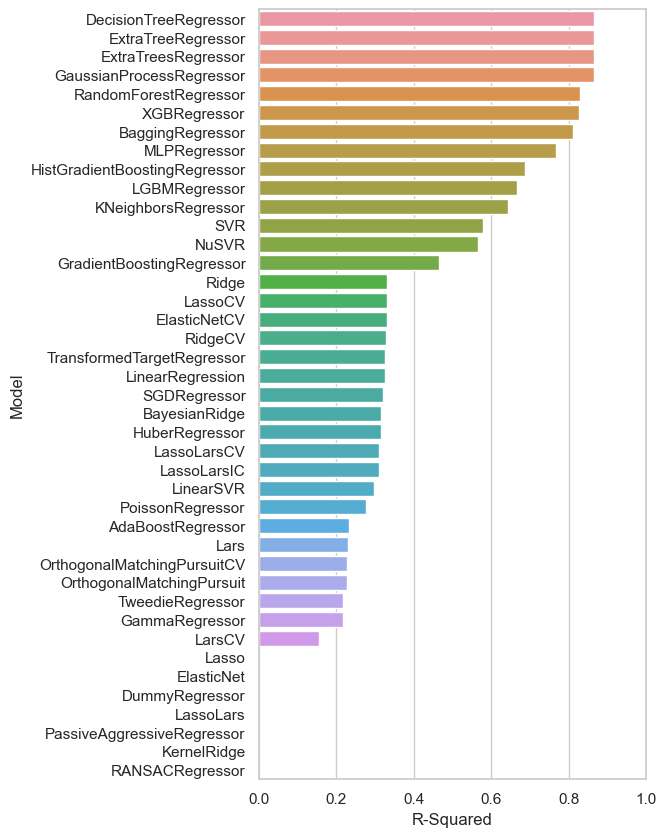

In [20]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

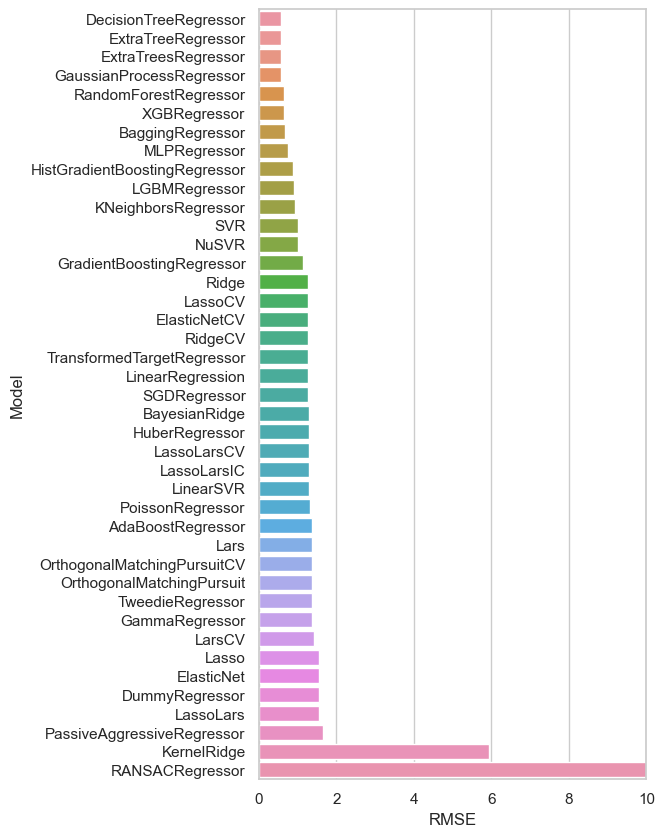

In [21]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

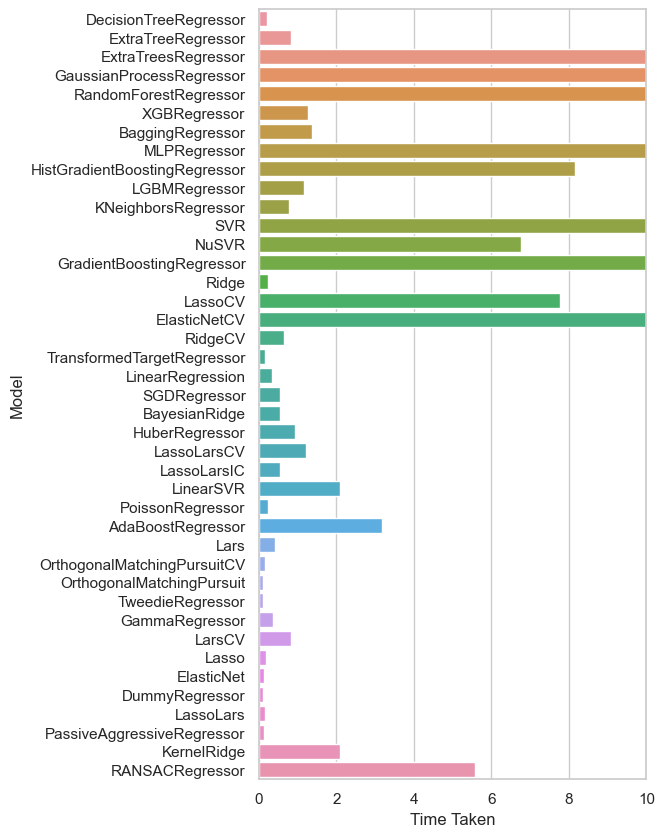

In [22]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))